# A304_SRO_NGO_Hall_300K_p1T_to_n1T

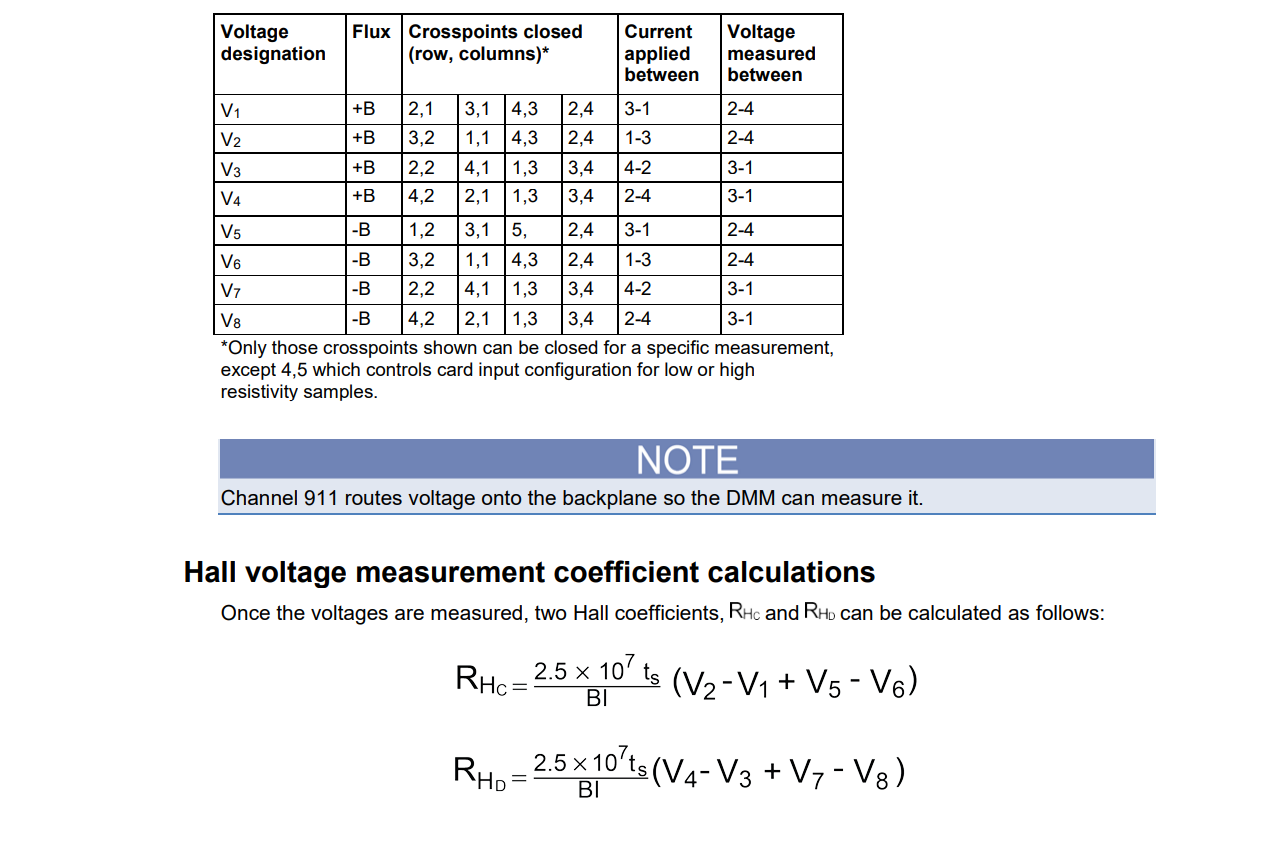

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [74]:
filename='C:\\Users\\Admin\\Desktop\\Data\\4_june_2023\\A304_SRO_NGO_Hall_300K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,-0.177155,300.000113,935.580222,-935.474932,-935.189765,935.153446,1.162000e-07,1000000
1,0.001,500.263434,300.001613,934.975827,-934.971320,-934.705021,934.431984,1.777000e-07,1000000
2,0.001,1000.409338,300.000844,934.437189,-934.287826,-933.838158,933.866558,2.735000e-07,1000000
3,0.001,1500.224615,300.001685,934.052321,-933.988443,-933.496508,933.494088,4.010000e-07,1000000
4,0.001,2000.603168,300.000620,933.840832,-933.786189,-933.194311,933.194846,4.967000e-07,1000000
...,...,...,...,...,...,...,...,...,...
78,0.001,6000.296680,300.000003,934.535409,-934.498279,-932.933199,933.023147,6.158000e-07,1000000
79,0.001,7000.259497,300.001399,934.669185,-934.724702,-932.963970,932.976636,6.099000e-07,1000000
80,0.001,8000.279321,300.001353,934.875451,-934.923226,-932.841228,932.905722,6.130000e-07,1000000
81,0.001,9000.421484,300.000748,935.123809,-935.106058,-932.755944,932.817597,6.038000e-07,1000000


In [75]:
df['V1'] = -1*df['V1']
df['V2'] = -1*df['V2']
df['V3'] = -1*df['V3']
df['V4'] = -1*df['V4']

### Converting B to integer B

In [76]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [77]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,-0.177155,0,300.000113,-935.580222,935.474932,935.189765,-935.153446,1.162000e-07,1000000
1,0.001,500.263434,500,300.001613,-934.975827,934.971320,934.705021,-934.431984,1.777000e-07,1000000
2,0.001,1000.409338,1000,300.000844,-934.437189,934.287826,933.838158,-933.866558,2.735000e-07,1000000
3,0.001,1500.224615,1500,300.001685,-934.052321,933.988443,933.496508,-933.494088,4.010000e-07,1000000
4,0.001,2000.603168,2000,300.000620,-933.840832,933.786189,933.194311,-933.194846,4.967000e-07,1000000


In [78]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

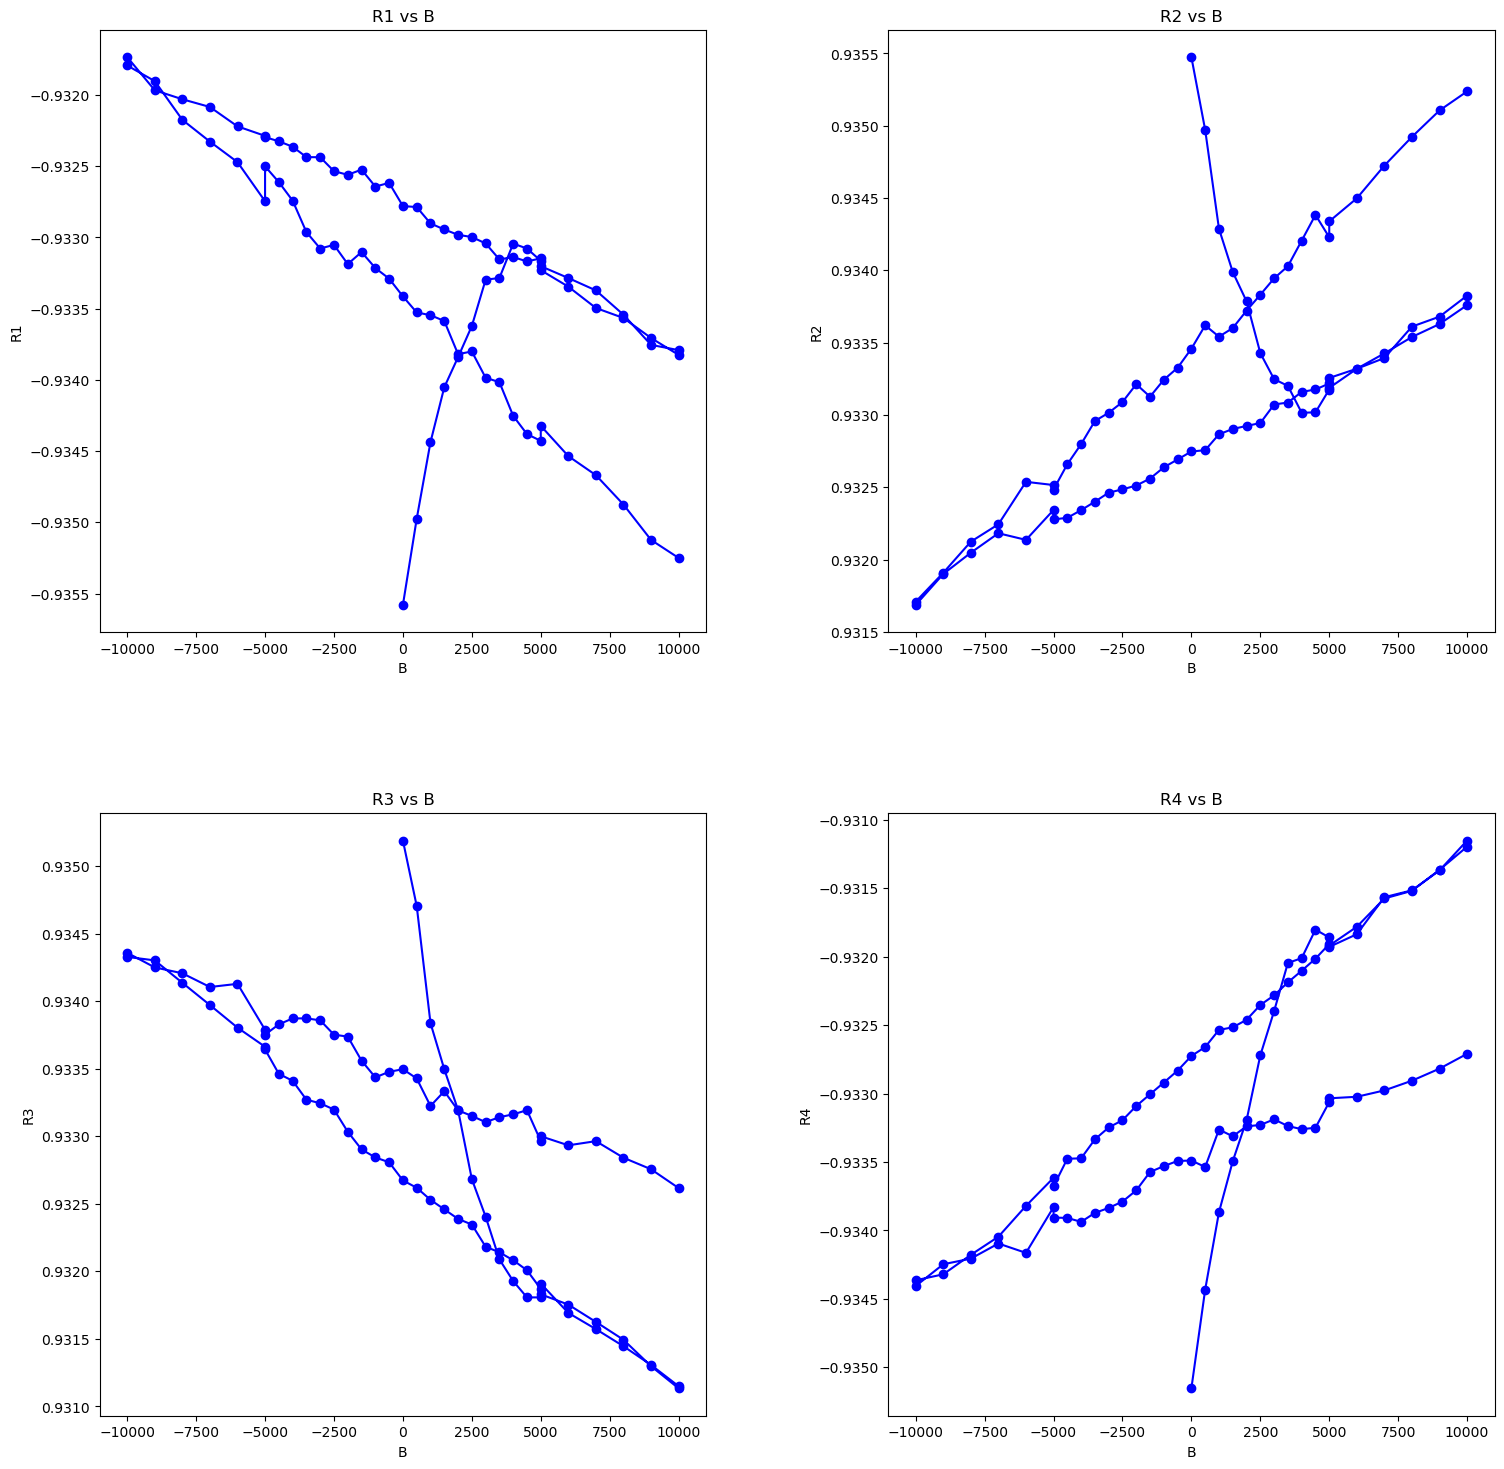

In [79]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [80]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

16

In [81]:
df = df.iloc[B_max_first_idx+1:].copy()
data.reset_index(inplace = True, drop = True) # resetting index

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [82]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [83]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [84]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [85]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
17,0.001,10000.325586,10000,300.000491,-933.824800,933.759333,931.150010,-931.195765,6.858000e-07,1000000
18,0.001,9000.374463,9000,300.000410,-933.706391,933.628715,931.306907,-931.364910,6.771000e-07,1000000
19,0.001,8000.470435,8000,299.999683,-933.565869,933.539145,931.445676,-931.518407,6.696000e-07,1000000
20,0.001,7000.629199,7000,300.001396,-933.495688,933.425802,931.572382,-931.574211,6.624000e-07,1000000
21,0.001,6000.422412,6000,300.000809,-933.346021,933.319547,931.692344,-931.781092,6.627000e-07,1000000


In [86]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
50,0.001,-10000.230859,-10000,300.001222,-931.793281,931.708253,934.358404,-934.405824,5.795000e-07,1000000
51,0.001,-9000.496973,-9000,300.000757,-931.903051,931.908234,934.250249,-934.246883,5.781000e-07,1000000
52,0.001,-8000.410059,-8000,300.000844,-932.174877,932.123433,934.206659,-934.205830,5.866000e-07,1000000
53,0.001,-7000.332031,-7000,300.001222,-932.327703,932.243672,934.105138,-934.095259,5.820000e-07,1000000
54,0.001,-6000.383203,-6000,300.000793,-932.471586,932.537328,934.128611,-934.163731,5.758000e-07,1000000


In [87]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [88]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,300.000491,-933.824800,933.759333,931.150010,-931.195765,-931.793281,931.708253,934.358404,-934.405824,1000000
1,0.001,9000,300.000410,-933.706391,933.628715,931.306907,-931.364910,-931.903051,931.908234,934.250249,-934.246883,1000000
2,0.001,8000,299.999683,-933.565869,933.539145,931.445676,-931.518407,-932.174877,932.123433,934.206659,-934.205830,1000000
3,0.001,7000,300.001396,-933.495688,933.425802,931.572382,-931.574211,-932.327703,932.243672,934.105138,-934.095259,1000000
4,0.001,6000,300.000809,-933.346021,933.319547,931.692344,-931.781092,-932.471586,932.537328,934.128611,-934.163731,1000000


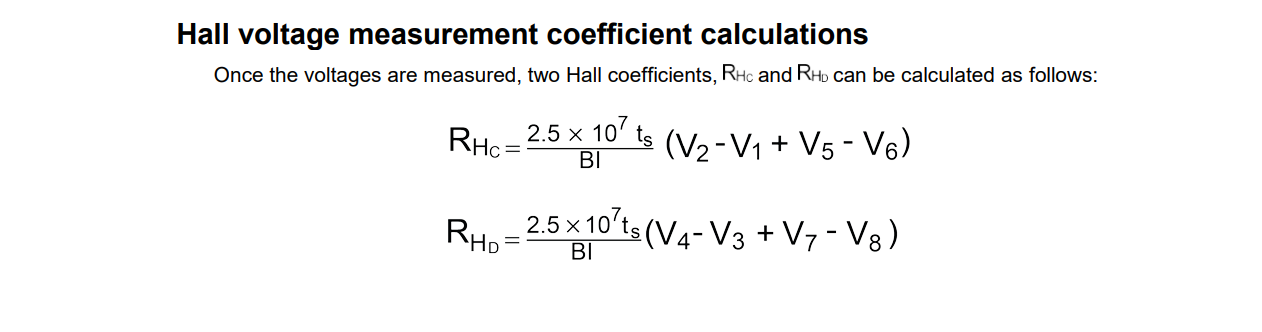
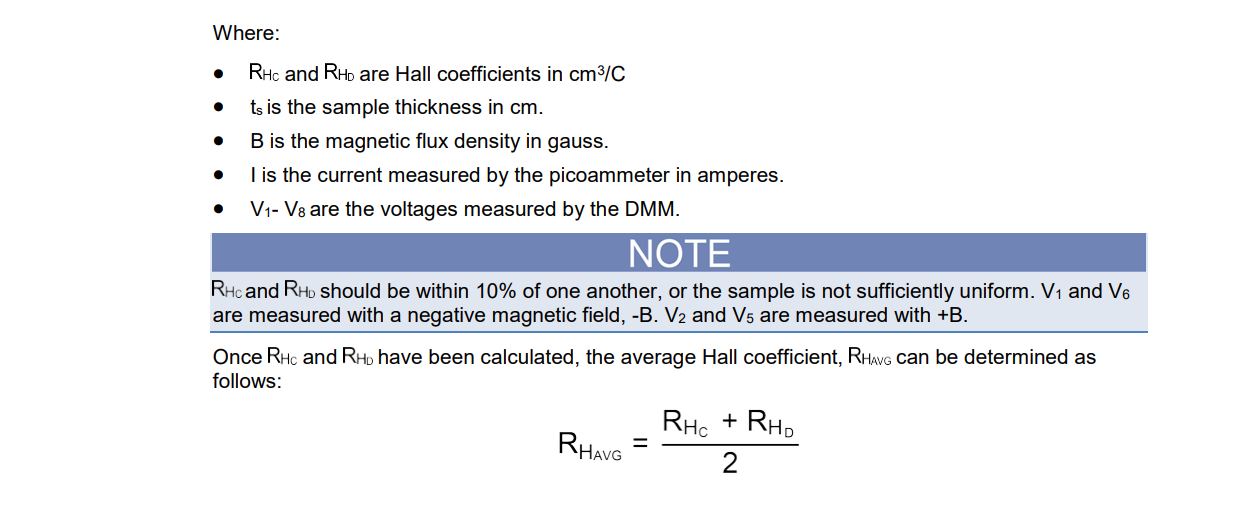

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [89]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

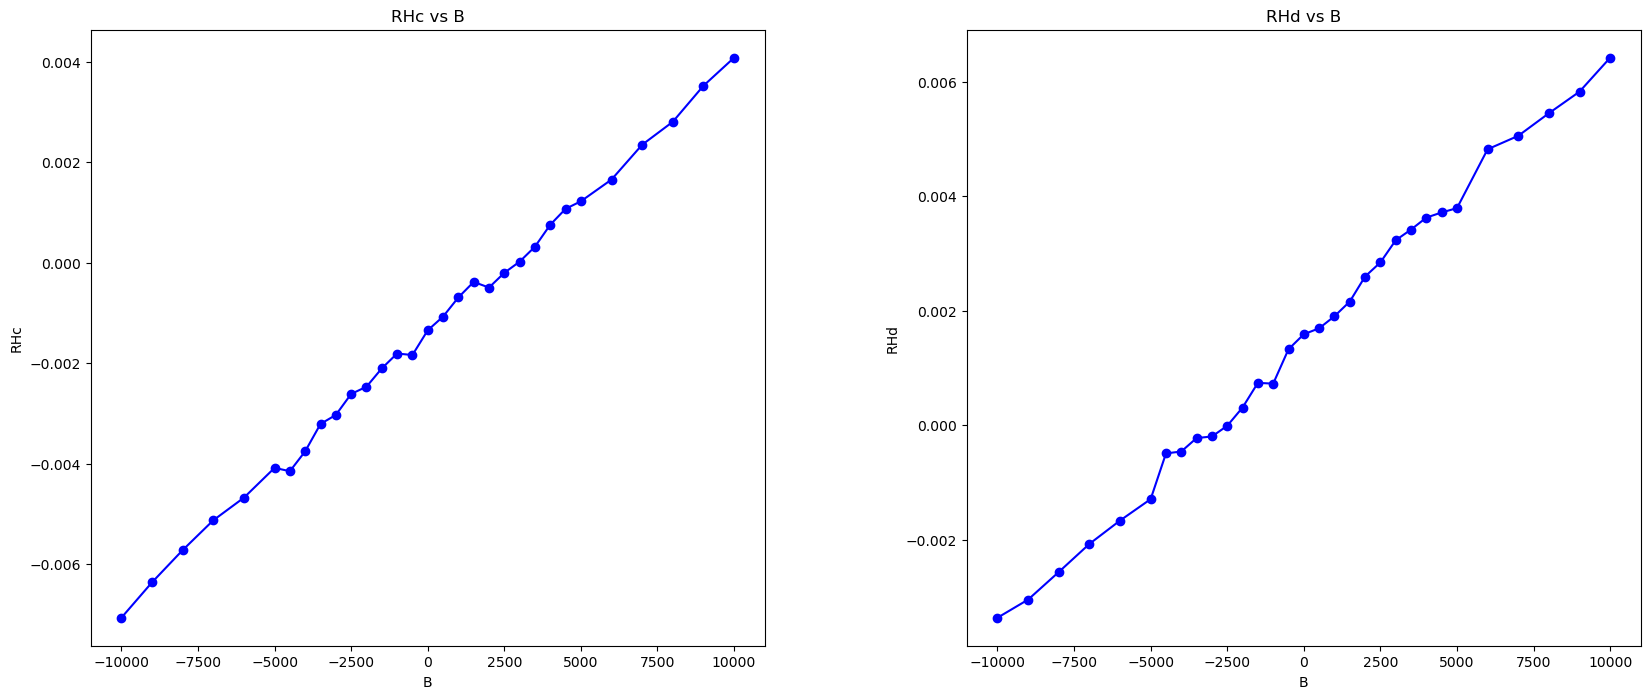

In [90]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

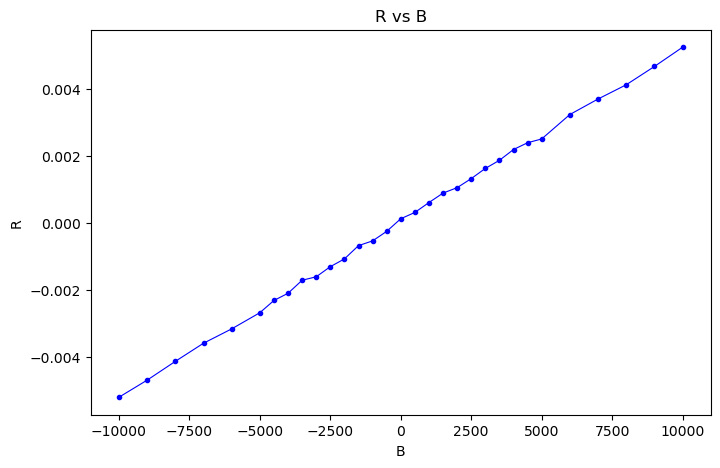

In [91]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [92]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,300.001222,-931.793281,931.708253,934.358404,-934.405824,-933.824800,933.759333,931.150010,-931.195765,1000000
1,0.001,-9000,300.000757,-931.903051,931.908234,934.250249,-934.246883,-933.706391,933.628715,931.306907,-931.364910,1000000
2,0.001,-8000,300.000844,-932.174877,932.123433,934.206659,-934.205830,-933.565869,933.539145,931.445676,-931.518407,1000000
3,0.001,-7000,300.001222,-932.327703,932.243672,934.105138,-934.095259,-933.495688,933.425802,931.572382,-931.574211,1000000
4,0.001,-6000,300.000793,-932.471586,932.537328,934.128611,-934.163731,-933.346021,933.319547,931.692344,-931.781092,1000000


### Hall resistance calculation

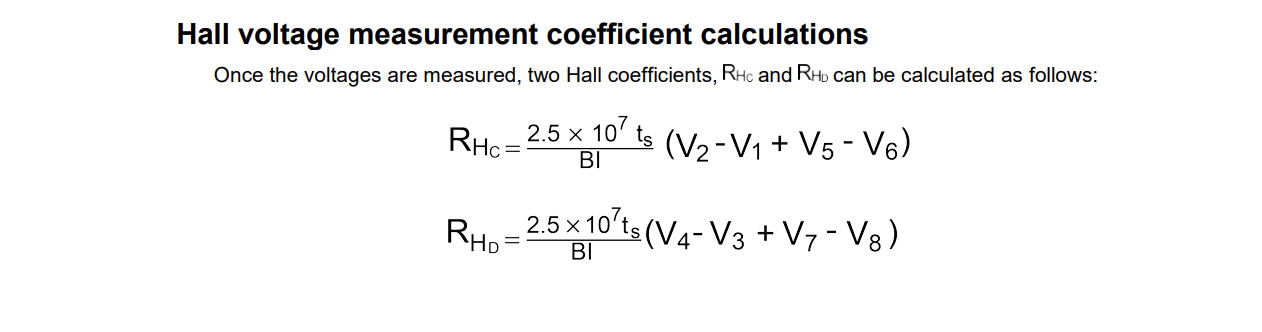

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [93]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

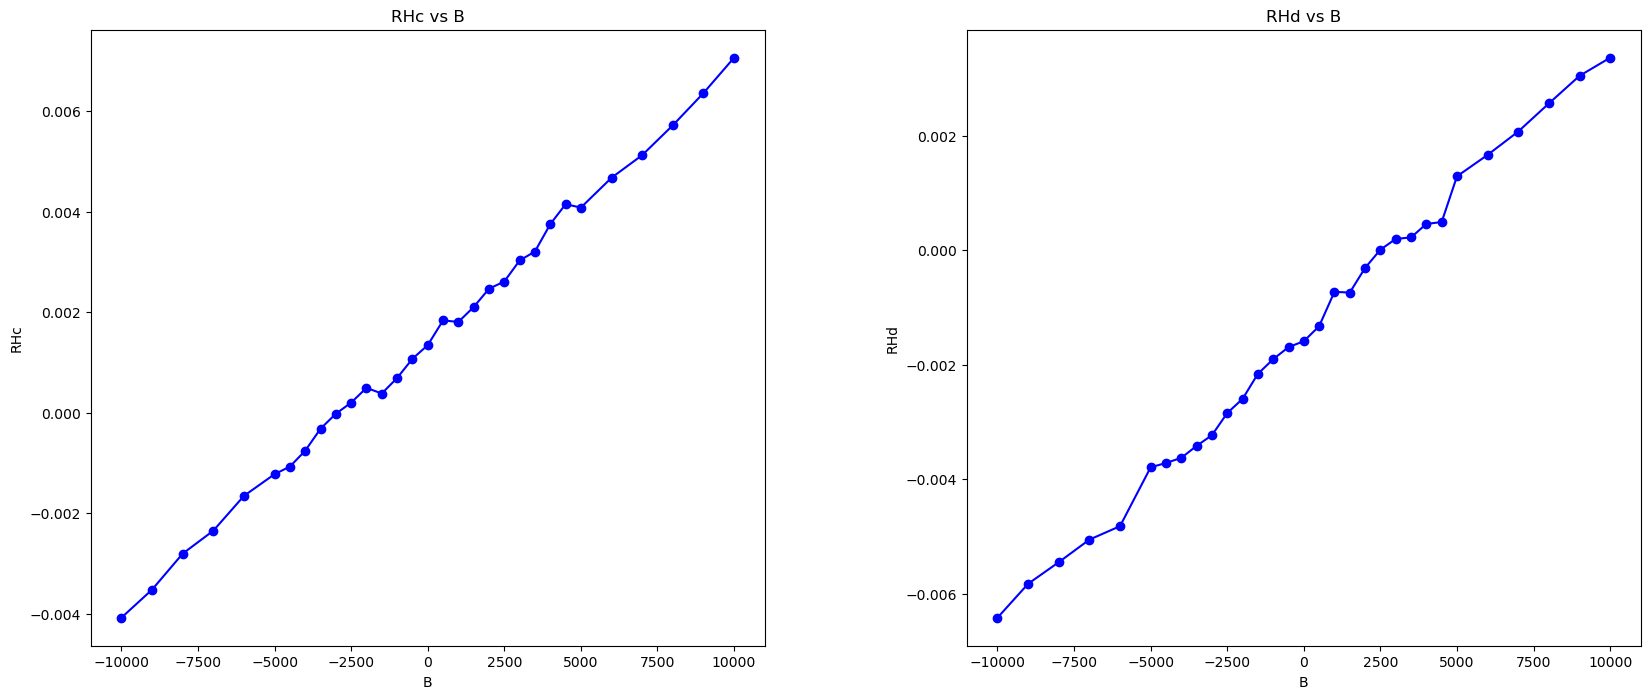

In [94]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

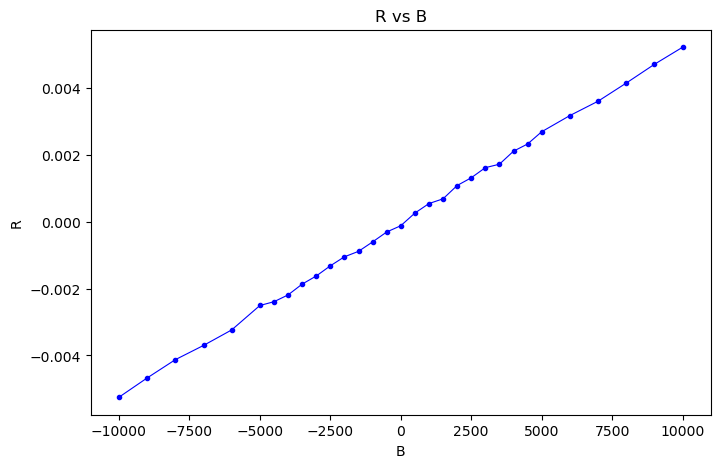

In [95]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

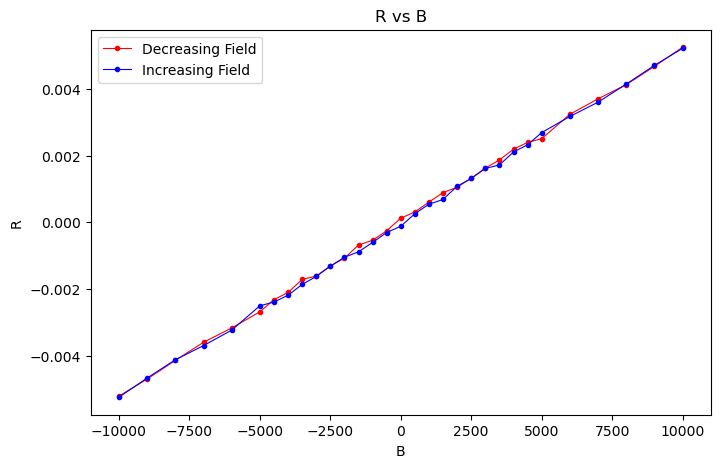

In [96]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
x = data['B'].values.reshape((-1,1))
y = data['R'].values

In [99]:
model = LinearRegression(fit_intercept = True).fit(x, y)

In [100]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

coefficient of determination: 0.9995620960437759
intercept: 2.2853806680639834e-05
slope: [5.23366051e-07]


In [101]:
y_pred = model.predict(x)

# Hall Coefficient

In [102]:
slope = model.coef_ # ohm per gauss
thickness = 54*10**-5 # in cm

In [103]:
R_hall_coef = 2.5*(10**7)*thickness*slope[0]

In [104]:
R_hall_coef #cm3/C

0.00706544168544887

# Density of Charge Carrier

In [105]:
n = 1/(R_hall_coef*-1*1.602*10**-19)  

In [106]:
n # per cubic cm

-8.834829486016258e+20